In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import random, re
import time

In [2]:
industry_df = pd.read_csv("Data Set - industrial_safety_and_health_database_with_accidents_description.csv")

In [3]:
industry_df.head()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [4]:
industry_df.shape

(425, 11)

In [5]:
industry_df.dtypes

Unnamed: 0                   int64
Data                        object
Countries                   object
Local                       object
Industry Sector             object
Accident Level              object
Potential Accident Level    object
Genre                       object
Employee or Third Party     object
Critical Risk               object
Description                 object
dtype: object

In [6]:
# Remove 'Unnamed: 0' column from Data frame
industry_df.drop("Unnamed: 0", axis=1, inplace=True)

In [7]:
# Rename 'Data', 'Countries', 'Genre', 'Employee or Third Party' columns in Data frame
industry_df.rename(columns={'Data':'Date', 'Countries':'Country', 'Genre':'Gender', 'Employee or Third Party':'Employee type'}, inplace=True)

In [8]:
# Check duplicates in a data frame
industry_df.duplicated().sum()

7

In [9]:
# View the duplicate records
duplicates = industry_df.duplicated()

industry_df[duplicates]

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description
77,2016-04-01 00:00:00,Country_01,Local_01,Mining,I,V,Male,Third Party (Remote),Others,In circumstances that two workers of the Abrat...
262,2016-12-01 00:00:00,Country_01,Local_03,Mining,I,IV,Male,Employee,Others,During the activity of chuteo of ore in hopper...
303,2017-01-21 00:00:00,Country_02,Local_02,Mining,I,I,Male,Third Party (Remote),Others,Employees engaged in the removal of material f...
345,2017-03-02 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,On 02/03/17 during the soil sampling in the re...
346,2017-03-02 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,On 02/03/17 during the soil sampling in the re...
355,2017-03-15 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,Team of the VMS Project performed soil collect...
397,2017-05-23 00:00:00,Country_01,Local_04,Mining,I,IV,Male,Third Party,Projection of fragments,In moments when the 02 collaborators carried o...


In [10]:
# Delete duplicate rows
industry_df.drop_duplicates(inplace=True)

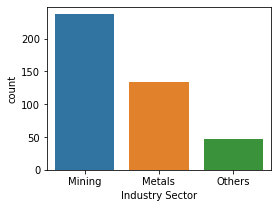

In [11]:
f, axis = plt.subplots(1, figsize=(4,3))

sns.countplot(data=industry_df,x=industry_df['Industry Sector'])
plt.show()

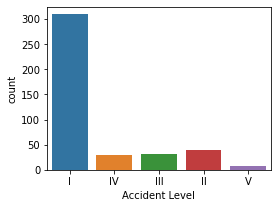

In [12]:
f, axis = plt.subplots(1, figsize=(4,3))

sns.countplot(data=industry_df,x=industry_df['Accident Level'])
plt.show()

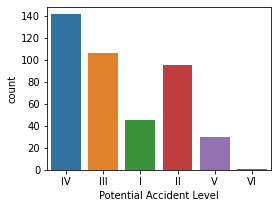

In [13]:
f, axis = plt.subplots(1, figsize=(4,3))

sns.countplot(data=industry_df,x=industry_df['Potential Accident Level'])
plt.show()

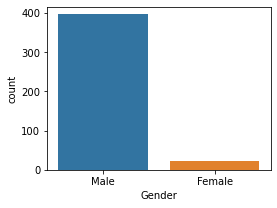

In [14]:
f, axis = plt.subplots(1, figsize=(4,3))

sns.countplot(data=industry_df,x=industry_df['Gender'])
plt.show()

In [15]:
# Check the presence of missing values
industry_df.isnull().sum()

Date                        0
Country                     0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Gender                      0
Employee type               0
Critical Risk               0
Description                 0
dtype: int64

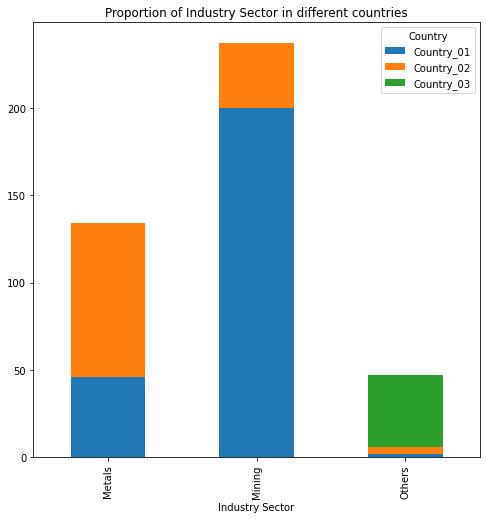

In [16]:
# Check the proportion of Industry sector in different countries
indsec_cntry_table = pd.crosstab(index = industry_df['Industry Sector'], columns = industry_df['Country'])
indsec_cntry_table.plot(kind = 'bar', figsize=(8,8), stacked = True)
plt.title("Proportion of Industry Sector in different countries")
plt.show()

In [17]:
industry_df['Date'] = pd.to_datetime(industry_df['Date'])

industry_df['Year'] = industry_df.Date.apply(lambda x : x.year)
industry_df['Month'] = industry_df.Date.apply(lambda x : x.month)
industry_df['Day'] = industry_df.Date.apply(lambda x : x.day)
industry_df['Weekday'] = industry_df.Date.apply(lambda x : x.day_name())
industry_df['WeekofYear'] = industry_df.Date.apply(lambda x : x.weekofyear)

In [18]:
# function to create month variable into seasons
def month2seasons(x):
    if x in [9, 10, 11]:
        season = 'Spring'
    elif x in [12, 1, 2]:
        season = 'Summer'
    elif x in [3, 4, 5]:
        season = 'Autumn'
    elif x in [6, 7, 8]:
        season = 'Winter'
    return season

In [19]:
industry_df['Season'] = industry_df['Month'].apply(month2seasons)
industry_df.head(3)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description,Year,Month,Day,Weekday,WeekofYear,Season
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,53,Summer
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,2,Saturday,53,Summer
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,6,Wednesday,1,Summer


In [20]:
import nltk; nltk.download('wordnet'); nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string

nltk.download('averaged_perceptron_tagger')

appos = {"ain't": "am not", "aren't": "are not", "can't": "cannot", 
         "can't've": "cannot have", "'cause": "because", 
         "could've": "could have", "couldn't": "could not", 
         "couldn't've": "could not have", "didn't": "did not", 
         "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
         "hadn't've": "had not have", "hasn't": "has not", 
         "haven't": "have not", "he'd": "he would", "he'd've": "he would have", 
         "he'll": "he will", "he'll've": "he will have", 
         "he's": "he is", "how'd": "how did", 
         "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
         "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
         "I'll've": "I will have", "I'm": "I am", "I've": "I have", 
         "isn't": "is not", "it'd": "it would", "it'd've": "it would have", 
         "it'll": "it will", "it'll've": "it will have", "it's": "it is", 
         "let's": "let us", "ma'am": "madam", "mayn't": "may not", 
         "might've": "might have", "mightn't": "might not", 
         "mightn't've": "might not have", "must've": "must have", 
         "mustn't": "must not", "mustn't've": "must not have", 
         "needn't": "need not", "needn't've": "need not have",
         "o'clock": "of the clock", "oughtn't": "ought not", 
         "oughtn't've": "ought not have", "shan't": "shall not", 
         "sha'n't": "shall not", "shan't've": "shall not have", 
         "she'd": "she would", "she'd've": "she would have", 
         "she'll": "she will", "she'll've": "she will have",
         "she's": "she is", "should've": "should have", 
         "shouldn't": "should not", "shouldn't've": "should not have", 
         "so've": "so have", "so's": "so is", 
         "that'd": "that had", "that'd've": "that would have", 
         "that's": "that that is", "there'd": "there would", 
         "there'd've": "there would have", "there's": "there is", 
         "they'd": "they would", "they'd've": "they would have", 
         "they'll": "they will", "they'll've": "they will have", 
         "they're": "they are", "they've": "they have", 
         "to've": "to have", "wasn't": "was not", "we'd": "we would", 
         "we'd've": "we would have", "we'll": "we will", 
         "we'll've": "we will have", "we're": "we are", 
         "we've": "we have", "weren't": "were not", 
         "what'll": "what will", "what'll've": "what will have", 
         "what're": "what are", "what's": "what is", 
         "what've": "what have", "when's": "when is", 
         "when've": "when have", "where'd": "where did", 
         "where's": "where is", "where've": "where have", 
         "who'll": "who will", "who'll've": "who will have", 
         "who's": "who is", "who've": "who have", 
         "why's": "why is", "why've": "why have", "will've": "will have", 
         "won't": "will not", "won't've": "will not have",
         "would've": "would have", "wouldn't": "would not", 
         "wouldn't've": "would not have", "y'all": "you all", 
         "y'all'd": "you all would", "y'all'd've": "you all would have", 
         "y'all're": "you all are", "y'all've": "you all have", 
         "you'd": "you would", "you'd've": "you would have",
         "you'll": "you will", "you'll've": "you will have", 
         "you're": "you are", "you've": "you have"}

# Helper function to replace appos
def replace_words(description):
    cleaned_description = []
    for word in str(description).split():
        if word.lower() in appos.keys():
            cleaned_description.append(appos[word.lower()])
        else:
            cleaned_description.append(word)
    return ' '.join(cleaned_description)

# Helper function to remove punctuations
# Reference: https://www.programiz.com/python-programming/methods/string/translate
PUNCT_TO_REMOVE = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~' #string.punctuation
def remove_punctuation(text):
    """function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

# Helper function to lemmatize
lemmatizer = WordNetLemmatizer()
def lemmatize(text):
  return ''.join([lemmatizer.lemmatize(word) for word in text])

# Helper function to remove stopwords
stoplist = set(stopwords.words('english'))
stoplist.update(('cm', 'kg', 'mr', 'wa' ,'nv', 'ore', 'da', 'pm', 'am', 'cx'))
stoplist.remove('not')
def remove_stopwords(text):
    """function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in stoplist])

# Helper function for wordcloud
# Reference: https://www.kaggle.com/aashita/word-clouds-of-various-shapes
def plot_wordcloud(text, mask = None, max_words = 500, max_font_size = 40, 
                   figure_size = (12, 6), title = None, title_size = 15):
    wordcloud = WordCloud(background_color = 'white', max_words = max_words,
                          random_state = 42, width = 350, height = 150, 
                          mask = mask, stopwords = stoplist, collocations = False)
    wordcloud.generate(str(text))
    
    plt.figure(figsize = figure_size)
    plt.imshow(wordcloud, interpolation = 'bilinear');
    plt.title(title, fontdict = {'size': title_size, 'color': 'black', 
                               'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()

# Second helper function for lemmatizing
lemmatizer = WordNetLemmatizer()
def lem(text):
    pos_dict = {'N': wn.NOUN, 'V': wn.VERB, 'J': wn.ADJ, 'R': wn.ADV}
    return(' '.join([lemmatizer.lemmatize(w,pos_dict.get(t, wn.NOUN)) for w,t in nltk.pos_tag(text.split())]))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\7uxs48\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\7uxs48\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\7uxs48\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [21]:

print('--'*30); print('Converting description to lower case')
industry_df['Cleaned_Description'] = industry_df['Description'].apply(lambda x : x.lower())

print('Replacing apostrophes to the standard lexicons')
industry_df['Cleaned_Description'] = industry_df['Cleaned_Description'].apply(lambda x : replace_words(x))

print('Removing punctuations')
industry_df['Cleaned_Description'] = industry_df['Cleaned_Description'].apply(lambda x: remove_punctuation(x))

print('Applying Lemmatizer')
industry_df['Cleaned_Description'] = industry_df['Cleaned_Description'].apply(lambda x: lemmatize(x))

print('Removing multiple spaces between words')
industry_df['Cleaned_Description'] = industry_df['Cleaned_Description'].apply(lambda x: re.sub(' +', ' ', x))


print('--'*30)

------------------------------------------------------------
Converting description to lower case
Replacing apostrophes to the standard lexicons
Removing punctuations
Applying Lemmatizer
Removing multiple spaces between words
------------------------------------------------------------


In [22]:
pip install --upgrade gensim

Requirement already up-to-date: gensim in c:\users\7uxs48\anaconda3\lib\site-packages (4.1.2)
Note: you may need to restart the kernel to use updated packages.


In [23]:
print('--'*45); print('Get the length of each line, find the maximum length and print the maximum length line'); 
print('Length of line ranges from 64 to 672.'); print('--'*45)

# Get length of each line
industry_df['line_length'] = industry_df['Cleaned_Description'].str.len()

print('Minimum line length: {}'.format(industry_df['line_length'].min()))
print('Maximum line length: {}'.format(industry_df['line_length'].max()))
print('Line with maximum length: {}'.format(industry_df[industry_df['line_length'] == industry_df['line_length'].max()]['Cleaned_Description'].values[0]))

------------------------------------------------------------------------------------------
Get the length of each line, find the maximum length and print the maximum length line
Length of line ranges from 64 to 672.
------------------------------------------------------------------------------------------
Minimum line length: 92
Maximum line length: 1010
Line with maximum length: when performing the sleeve removal maneuver when the hole was 600 meters deep general da silva pressed only one side of the locking nut of the rods which together with the jack holds the entire weight of the rods in the maneuver as the locking procedure was not effective the weight of the rods was only secured by the steel wire rope of the probe winch at the moment that driller pedro released the brake of the winch the inefficacy of the locking done only in one side of the chestnut and without aid of the monkey caused the sliding of the rods auxiliary was prepared for manual unlocking of the rods holding the f

In [24]:
print('--'*45); print('Get the number of words, find the maximum number of words and print the maximum number of words'); 
print('Number of words ranges from 10 to 98.'); print('--'*45)

# Get length of each line
industry_df['nb_words'] = industry_df['Cleaned_Description'].apply(lambda x: len(x.split(' ')))

------------------------------------------------------------------------------------------
Get the number of words, find the maximum number of words and print the maximum number of words
Number of words ranges from 10 to 98.
------------------------------------------------------------------------------------------


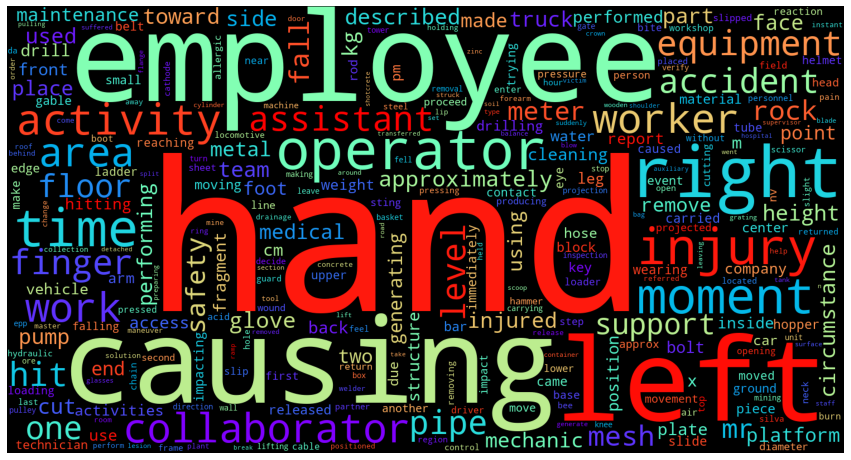

In [25]:
wordcloud = WordCloud(width = 1500, height = 800, random_state=0, background_color='black', colormap='rainbow', \
                      min_font_size=5, max_words=300, collocations=False).generate(" ".join(industry_df['Cleaned_Description'].values))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


In [26]:
print('--'*30); print('Five point summary for number of words')
display(industry_df['nb_words'].describe().round(0).astype(int)); 

print('99% quantilie: {}'.format(industry_df['nb_words'].quantile(0.99)));print('--'*30)

------------------------------------------------------------
Five point summary for number of words


count    418
mean      65
std       32
min       16
25%       40
50%       60
75%       82
max      183
Name: nb_words, dtype: int32

99% quantilie: 159.48999999999995
------------------------------------------------------------


In [27]:
from gensim.models import Word2Vec
# define training data
sentences = industry_df['Cleaned_Description']

# train model
model = Word2Vec(sentences, min_count=1)

# summarize the loaded model
print(model)

# summarize vocabulary
words = list(model.wv.index_to_key)
print(words)

# save model
#model.save('model.bin')

Word2Vec(vocab=48, vector_size=100, alpha=0.025)
[' ', 'e', 't', 'a', 'o', 'i', 'h', 'n', 'r', 's', 'l', 'c', 'd', 'f', 'p', 'm', 'g', 'u', 'w', 'b', 'y', 'v', 'k', '0', '1', 'x', 'j', '2', '5', '4', '3', 'q', '8', '7', '6', 'z', '9', '\u200b', '°', 'á', 'é', 'ã', 'ó', 'â', 'í', 'ô', '¼', 'ú']


In [28]:
from tqdm import tqdm

embeddings_index = {}
EMBEDDING_FILE = 'glove.6B.200d.txt'
f = open(EMBEDDING_FILE, encoding="utf8")
for line in tqdm(f):
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

400000it [00:30, 13296.67it/s]

Found 400000 word vectors.


In [29]:
# this function creates a normalized vector for the whole sentence
def sent2vec(s):
    words = str(s).lower()
    words = word_tokenize(words)
    #words = [w for w in words if not w in stop_words]
    words = [w for w in words if w.isalpha()]
    M = []
    for w in words:
        try:
            M.append(embeddings_index[w])
        except:
            continue
    M = np.array(M)
    v = M.sum(axis=0)
    if type(v) != np.ndarray:
        return np.zeros(300)
    return v / np.sqrt((v ** 2).sum())

In [30]:
from nltk.tokenize import word_tokenize

# create sentence GLOVE embeddings vectors using the above function for training and validation set
ind_glove_df = [sent2vec(x) for x in tqdm(industry_df['Cleaned_Description'])]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 418/418 [00:00<00:00, 2765.84it/s]


In [31]:
ind_glove_df[0]

array([ 9.28910356e-03,  6.93368539e-02, -7.27849038e-05, -3.93287502e-02,
        1.40492674e-02,  6.30981401e-02, -7.00636506e-02, -2.12307163e-02,
       -2.85552517e-02,  1.60983745e-02,  1.08201019e-02,  5.44591174e-02,
        3.75398993e-02,  2.33113989e-02,  9.07307342e-02, -1.57709159e-02,
        4.13321890e-03,  3.15995999e-02, -9.45691764e-03, -1.20418267e-02,
        4.22633514e-02,  6.63789153e-01,  3.39912847e-02, -2.71379855e-03,
        2.59857029e-02,  2.28768364e-02, -4.05137353e-02,  2.27483734e-02,
       -3.29361646e-03,  7.04122649e-04,  2.77600531e-02, -4.18297239e-02,
       -3.35876481e-03,  3.41943279e-03, -7.29908329e-03, -3.26016881e-02,
       -1.42883301e-01, -7.00050667e-02, -3.98264900e-02, -1.86401308e-02,
        2.51627602e-02, -3.75698060e-02,  1.72892604e-02,  7.41079450e-02,
       -7.79693946e-03,  7.26518333e-02,  6.41815215e-02,  2.97078751e-02,
        3.09688374e-02,  8.84541869e-02, -1.12419380e-02,  5.19632036e-03,
        3.65180429e-03,  

#### Variable Creation - TFIDF Features

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

ind_tfidf_df = pd.DataFrame()
for i in [1,2,3]:
    vec_tfidf = TfidfVectorizer(max_features=10, norm='l2', stop_words='english', lowercase=True, use_idf=True, ngram_range=(i,i))
    X = vec_tfidf.fit_transform(industry_df['Cleaned_Description']).toarray()
    tfs = pd.DataFrame(X, columns=["TFIDF_" + n for n in vec_tfidf.get_feature_names()])
    ind_tfidf_df = pd.concat([ind_tfidf_df.reset_index(drop=True), tfs.reset_index(drop=True)], axis=1)

ind_tfidf_df.head(3)

,TFIDF_activity,TFIDF_area,TFIDF_causing,TFIDF_employee,TFIDF_hand,TFIDF_injury,TFIDF_left,TFIDF_operator,TFIDF_right,TFIDF_time,...,TFIDF_causing injury described,TFIDF_described time accident,TFIDF_finger left hand,TFIDF_finger right hand,TFIDF_generating described injury,TFIDF_hand causing injury,TFIDF_injury time accident,TFIDF_left hand causing,TFIDF_right hand causing,TFIDF_time accident employee
0,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.55361,0.383117,0.0,0.413742,0.460892,0.403897,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Variable Creation - Label Encoding

In [33]:
# To replace white space everywhere in Employee type
industry_df['Employee type'] = industry_df['Employee type'].str.replace(' ', '_')
industry_df['Employee type'].value_counts()

Third_Party             185
Employee                178
Third_Party_(Remote)     55
Name: Employee type, dtype: int64

In [34]:
# To replace white space everywhere in Critical Risk
industry_df['Critical Risk'] = industry_df['Critical Risk'].str.replace('\n', '').str.replace(' ', '_')
industry_df['Critical Risk'].value_counts().head()

Others                 229
Pressed                 24
Manual_Tools            20
Chemical_substances     17
Cut                     14
Name: Critical Risk, dtype: int64

In [35]:
from sklearn.preprocessing import LabelEncoder

# Create Industry DataFrame
ind_featenc_df = pd.DataFrame()

# Label encoding
industry_df['Season'] = industry_df['Season'].replace('Summer', 'aSummer').replace('Autumn', 'bAutumn').replace('Winter', 'cWinter').replace('Spring', 'dSpring')
ind_featenc_df['Season'] = LabelEncoder().fit_transform(industry_df['Season']).astype(np.int8)

industry_df['Weekday'] = industry_df['Weekday'].replace('Monday', 'aMonday').replace('Tuesday', 'bTuesday').replace('Wednesday', 'cWednesday').replace('Thursday', 'dThursday').replace('Friday', 'eFriday').replace('Saturday', 'fSaturday').replace('Sunday', 'gSunday')
ind_featenc_df['Weekday'] = LabelEncoder().fit_transform(industry_df['Weekday']).astype(np.int8)

ind_featenc_df['Accident Level'] = LabelEncoder().fit_transform(industry_df['Accident Level']).astype(np.int8)
ind_featenc_df['Potential Accident Level'] = LabelEncoder().fit_transform(industry_df['Potential Accident Level']).astype(np.int8)

In [36]:
from keras.utils import np_utils

# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(ind_featenc_df['Accident Level'])
dummy_y


array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [37]:
# Dummy variables encoding
Country_dummies = pd.get_dummies(industry_df['Country'], columns=["Country"], drop_first=True)
Local_dummies = pd.get_dummies(industry_df['Local'], columns=["Local"], drop_first=True)
Gender_dummies = pd.get_dummies(industry_df['Gender'], columns=["Gender"], drop_first=True)
IS_dummies = pd.get_dummies(industry_df['Industry Sector'], columns=['Industry Sector'], prefix='IS', drop_first=True)
EmpType_dummies = pd.get_dummies(industry_df['Employee type'], columns=['Employee type'], prefix='EmpType', drop_first=True)
CR_dummies = pd.get_dummies(industry_df['Critical Risk'], columns=['Critical Risk'], prefix='CR', drop_first=True)

# Merge the above dataframe with the original dataframe ind_feat_df
ind_featenc_df = ind_featenc_df.join(Country_dummies.reset_index(drop=True)).join(Local_dummies.reset_index(drop=True)).join(Gender_dummies.reset_index(drop=True)).join(IS_dummies.reset_index(drop=True)).join(EmpType_dummies.reset_index(drop=True)).join(CR_dummies.reset_index(drop=True))

ind_featenc_df = industry_df[['Year','Month','Day','WeekofYear']].reset_index(drop=True).join(ind_featenc_df.reset_index(drop=True))

ind_featenc_df.head(3)

,Year,Month,Day,WeekofYear,Season,Weekday,Accident Level,Potential Accident Level,Country_02,Country_03,...,CR_Projection,CR_Projection/Burning,CR_Projection/Choco,CR_Projection/Manual_Tools,CR_Projection_of_fragments,CR_Suspended_Loads,CR_Traffic,CR_Vehicles_and_Mobile_Equipment,CR_Venomous_Animals,CR_remains_of_choco
0,2016,1,1,53,0,4,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2016,1,2,53,0,5,0,3,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2016,1,6,1,0,2,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
# Check NaN values
np.any(np.isnan(ind_featenc_df))

False

In [39]:
# Consider only top 30 GLOVE features
ind_feat_df = ind_featenc_df.join(pd.DataFrame(ind_glove_df).iloc[:,0:30].reset_index(drop=True))

In [40]:
ind_feat_df.head(3)

,Year,Month,Day,WeekofYear,Season,Weekday,Accident Level,Potential Accident Level,Country_02,Country_03,...,20,21,22,23,24,25,26,27,28,29
0,2016,1,1,53,0,4,0,3,0,0,...,0.042263,0.663789,0.033991,-0.002714,0.025986,0.022877,-0.040514,0.022748,-0.003294,0.000704
1,2016,1,2,53,0,5,0,3,1,0,...,0.013255,0.663710,-0.021372,-0.031337,0.048378,-0.035714,-0.061907,0.009785,0.010836,0.046505
2,2016,1,6,1,0,2,0,2,0,0,...,0.052326,0.648238,0.046345,-0.020786,0.036717,0.005619,-0.042718,0.017302,-0.030272,-0.018189


In [41]:
# Consider only top 30 GLOVE features
ind_feat_df = ind_featenc_df.join(ind_tfidf_df.reset_index(drop=True))

In [42]:
ind_feat_df.head(3)

,Year,Month,Day,WeekofYear,Season,Weekday,Accident Level,Potential Accident Level,Country_02,Country_03,...,TFIDF_causing injury described,TFIDF_described time accident,TFIDF_finger left hand,TFIDF_finger right hand,TFIDF_generating described injury,TFIDF_hand causing injury,TFIDF_injury time accident,TFIDF_left hand causing,TFIDF_right hand causing,TFIDF_time accident employee
0,2016,1,1,53,0,4,0,3,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016,1,2,53,0,5,0,3,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2016,1,6,1,0,2,0,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Sampling Techniques - Create Training and Test Set

In [43]:
X = ind_feat_df.drop(['Accident Level','Potential Accident Level'], axis = 1) # Considering all Predictors
y = ind_feat_df['Accident Level']

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1, stratify = y)

In [45]:
X_train, X_test, y_train_dummy, y_test_dummy = train_test_split(X, dummy_y, test_size = 0.20, random_state = 1, stratify = y)

In [46]:
print('X_train shape : ({0},{1})'.format(X_train.shape[0], X_train.shape[1]))
print('y_train shape : ({0},)'.format(y_train.shape[0]))
print('X_test shape : ({0},{1})'.format(X_test.shape[0], X_test.shape[1]))
print('y_test shape : ({0},)'.format(y_test.shape[0]))

X_train shape : (334,86)
y_train shape : (334,)
X_test shape : (84,86)
y_test shape : (84,)


In [47]:
# Display old accident level counts
ind_feat_df['Accident Level'].value_counts()

0    309
1     40
2     31
3     30
4      8
Name: Accident Level, dtype: int64

In [48]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

In [49]:
# Concatenate our training data back together
X_up = pd.concat([X_train, y_train], axis=1)

# Get the majority and minority class
acclevel_0_majority = X_up[X_up['Accident Level'] == 0]
acclevel_1_minority = X_up[X_up['Accident Level'] == 1]
acclevel_2_minority = X_up[X_up['Accident Level'] == 2]
acclevel_3_minority = X_up[X_up['Accident Level'] == 3]
acclevel_4_minority = X_up[X_up['Accident Level'] == 4]

# Upsample Level1 minority class
acclevel_1_minority_upsampled = resample(acclevel_1_minority,
                                replace = True, # sample with replacement
                                n_samples = len(acclevel_0_majority), # to match majority class
                                random_state = 1)

# Upsample Level2 minority class
acclevel_2_minority_upsampled = resample(acclevel_2_minority,
                                replace = True, # sample with replacement
                                n_samples = len(acclevel_0_majority), # to match majority class
                                random_state = 1)

# Upsample Level3 minority class
acclevel_3_minority_upsampled = resample(acclevel_3_minority,
                                replace = True, # sample with replacement
                                n_samples = len(acclevel_0_majority), # to match majority class
                                random_state = 1)

# Upsample Level4 minority class
acclevel_4_minority_upsampled = resample(acclevel_4_minority,
                                replace = True, # sample with replacement
                                n_samples = len(acclevel_0_majority), # to match majority class
                                random_state = 1)


In [50]:
# Combine majority class with upsampled minority classes
df_upsampled = pd.concat([acclevel_0_majority, acclevel_1_minority_upsampled, acclevel_2_minority_upsampled, acclevel_3_minority_upsampled, 
                          acclevel_4_minority_upsampled])

In [51]:
# Display new accident level counts
df_upsampled['Accident Level'].value_counts()

4    247
3    247
2    247
1    247
0    247
Name: Accident Level, dtype: int64

In [52]:
# Separate input features and target
X_train_up = df_upsampled.drop(['Accident Level'], axis = 1) # Considering all Predictors
y_train_up = df_upsampled['Accident Level']

In [53]:
sm = SMOTE(random_state=1)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
df_smote = pd.concat([pd.DataFrame(X_train_smote), pd.DataFrame(y_train_smote)], axis=1)
df_smote.columns = ['Year', 'Month', 'Day',
        'WeekofYear', 'Season', 'Weekday',
       'Country_02', 'Country_03', 'Local_02', 'Local_03', 'Local_04',
       'Local_05', 'Local_06', 'Local_07', 'Local_08', 'Local_09', 'Local_10',
       'Local_11', 'Local_12', 'Male', 'IS_Mining', 'IS_Others',
       'EmpType_Third_Party', 'EmpType_Third_Party_(Remote)',
       'CR_Blocking_and_isolation_of_energies', 'CR_Burn',
       'CR_Chemical_substances', 'CR_Confined_space', 'CR_Cut',
       'CR_Electrical_Shock', 'CR_Electrical_installation', 'CR_Fall',
       'CR_Fall_prevention', 'CR_Fall_prevention_(same_level)',
       'CR_Individual_protection_equipment', 'CR_Liquid_Metal',
       'CR_Machine_Protection', 'CR_Manual_Tools', 'CR_Not_applicable',
       'CR_Others', 'CR_Plates', 'CR_Poll', 'CR_Power_lock', 'CR_Pressed',
       'CR_Pressurized_Systems',
       'CR_Pressurized_Systems_/_Chemical_Substances', 'CR_Projection',
       'CR_Projection/Burning', 'CR_Projection/Choco',
       'CR_Projection/Manual_Tools', 'CR_Projection_of_fragments',
       'CR_Suspended_Loads', 'CR_Traffic', 'CR_Vehicles_and_Mobile_Equipment',
       'CR_Venomous_Animals', 'CR_remains_of_choco', 'TFIDF_activity', 'TFIDF_area',
       'TFIDF_causing', 'TFIDF_employee', 'TFIDF_hand', 'TFIDF_injury',
       'TFIDF_left', 'TFIDF_operator', 'TFIDF_right', 'TFIDF_time',
       'TFIDF_causing injury', 'TFIDF_described injury',
       'TFIDF_employee reports', 'TFIDF_finger left', 'TFIDF_injury described',
       'TFIDF_left foot', 'TFIDF_left hand', 'TFIDF_medical center',
       'TFIDF_right hand', 'TFIDF_time accident',
       'TFIDF_causing injury described', 'TFIDF_described time accident',
       'TFIDF_finger left hand', 'TFIDF_finger right hand',
       'TFIDF_generating described injury', 'TFIDF_hand causing injury',
       'TFIDF_injury time accident', 'TFIDF_left hand causing',
       'TFIDF_right hand causing', 'TFIDF_time accident employee', 'Accident Level']

In [54]:
# Separate input features and target
X_train_smote = df_smote.iloc[:,:-1] # Considering all Predictors
y_train_smote = df_smote.iloc[:,-1:]

In [55]:
X_train_smote.head(1)

,Year,Month,Day,WeekofYear,Season,Weekday,Country_02,Country_03,Local_02,Local_03,...,TFIDF_causing injury described,TFIDF_described time accident,TFIDF_finger left hand,TFIDF_finger right hand,TFIDF_generating described injury,TFIDF_hand causing injury,TFIDF_injury time accident,TFIDF_left hand causing,TFIDF_right hand causing,TFIDF_time accident employee
0,2016,9,1,35,3,3,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
# Display new accident level counts
y_train_smote['Accident Level'].value_counts()

4    247
3    247
2    247
1    247
0    247
Name: Accident Level, dtype: int64

In [57]:
# convert integers to dummy variables (i.e. one hot encoded)
y_train_smote_dummy = np_utils.to_categorical(y_train_smote['Accident Level'])
y_train_smote_dummy

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [58]:
# Transform independent features
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

scaler_X = StandardScaler()#StandardScaler()
pipeline = Pipeline(steps=[('s', scaler_X)])
X_train.iloc[:,:6] = pipeline.fit_transform(X_train.iloc[:,:6]) # Scaling only first 6 feautres

X_test.iloc[:,:6] = pipeline.fit_transform(X_test.iloc[:,:6]) # Scaling only first 6 feautres

C:\Users\7uxs48\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
C:\Users\7uxs48\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [59]:
X_train.head(3)

,Year,Month,Day,WeekofYear,Season,Weekday,Country_02,Country_03,Local_02,Local_03,...,TFIDF_causing injury described,TFIDF_described time accident,TFIDF_finger left hand,TFIDF_finger right hand,TFIDF_generating described injury,TFIDF_hand causing injury,TFIDF_injury time accident,TFIDF_left hand causing,TFIDF_right hand causing,TFIDF_time accident employee
202,-0.700765,1.168926,-1.673853,0.996914,1.728348,0.075496,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
258,-0.700765,1.802213,1.559083,1.934247,1.728348,-0.997510,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,-0.700765,-1.364221,0.058077,-1.382469,-1.221916,1.148501,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Use PCA - Extract Principal Components that capture about 95% of the variance in the data

In [60]:
# generating the covariance matrix and the eigen values for the PCA analysis
cov_matrix = np.cov(X_train.T) # the relevanat covariance matrix
print('Covariance Matrix \n%s', cov_matrix)

#generating the eigen values and the eigen vectors
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Covariance Matrix 
%s [[ 1.00300300e+00 -4.24727770e-01  2.53271550e-02 ... -2.06945085e-03
  -4.89406968e-03 -5.68968778e-03]
 [-4.24727770e-01  1.00300300e+00  2.68776694e-02 ...  7.08759577e-03
   4.65172198e-03  5.42953855e-03]
 [ 2.53271550e-02  2.68776694e-02  1.00300300e+00 ... -1.28805019e-03
  -5.08213127e-03 -3.28488592e-03]
 ...
 [-2.06945085e-03  7.08759577e-03 -1.28805019e-03 ...  6.86698871e-03
  -7.05215662e-05 -1.74059396e-04]
 [-4.89406968e-03  4.65172198e-03 -5.08213127e-03 ... -7.05215662e-05
   5.61025313e-03 -1.20024227e-04]
 [-5.68968778e-03  5.42953855e-03 -3.28488592e-03 ... -1.74059396e-04
  -1.20024227e-04  1.63635526e-02]]
Eigenvectors 
[[-3.52848651e-01 -5.95190322e-03  2.45569047e-01 ...  1.19761829e-16
  -1.68663353e-16  0.00000000e+00]
 [ 5.64490875e-01  2.14076816e-02  1.53603616e-02 ... -1.39498865e-15
   4.16954173e-16  0.00000000e+00]
 [ 2.64301524e-02  6.24916616e-01  7.40100622e-01 ... -2.23928710e-16
   1.07024953e-16  0.00000000e+00]
 ...
 [ 3.159

In [61]:
# the "cumulative variance explained" analysis 
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 28.99922478  40.28178824  50.25853388  58.22777673  64.00374413
  68.92991348  72.97702737  75.278389    77.16679249  78.99822186
  80.5516056   81.98239544  83.23007776  84.42662301  85.4175337
  86.369935    87.21343161  88.01851129  88.76791269  89.46856403
  90.11624836  90.71778334  91.29150158  91.83878164  92.33525963
  92.76492217  93.18871353  93.55952644  93.92254342  94.27180858
  94.59331254  94.90894975  95.19471368  95.46867378  95.73439484
  95.97735724  96.21648068  96.44707124  96.65031552  96.8498666
  97.04404075  97.22923753  97.40595474  97.57469201  97.73799604
  97.89662732  98.05126802  98.19277128  98.33010973  98.46049806
  98.58494837  98.70663182  98.80523781  98.89715145  98.98038321
  99.0624198   99.14174791  99.21246429  99.28037476  99.34403292
  99.40053439  99.45438009  99.50676837  99.5580343   99.6034291
  99.64541879  99.68108937  99.71285985  99.7425389   99.77105654
  99.79929815  99.82684952  99.85314185  99.87844

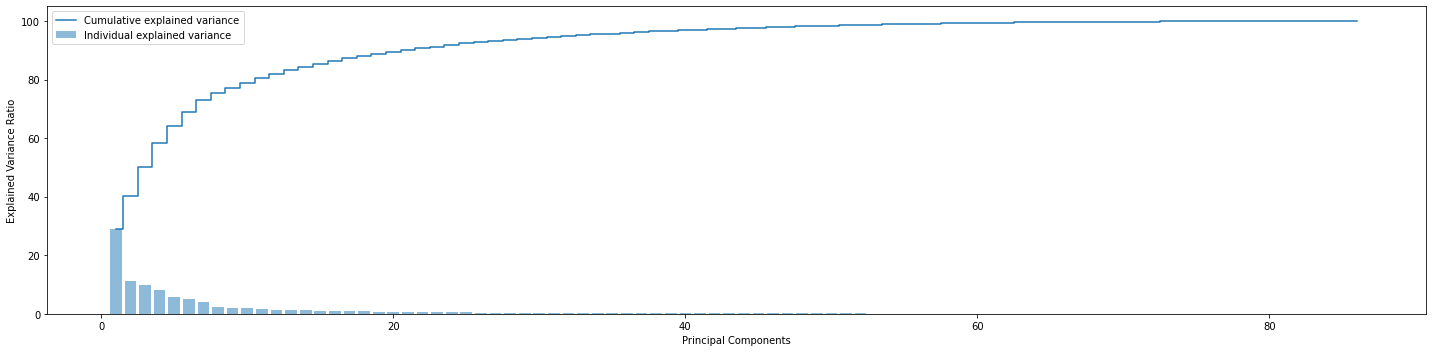

In [62]:
# Plotting the variance expalained by the principal components and the cumulative variance explained.
plt.figure(figsize=(20 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [63]:
from sklearn.decomposition import PCA

# Capturing 90% variance of the data
pca = PCA(n_components = 0.90)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

In [64]:
print(X_train_reduced.shape)
print(X_test_reduced.shape)

(334, 21)
(84, 21)


In [65]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score, roc_auc_score

# DummyClassifier to predict all Accident levels
dummy = DummyClassifier(strategy='stratified').fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

# checking unique labels
print('Unique predicted labels: ', (np.unique(dummy_pred)))

# checking accuracy
print('Test score: ', accuracy_score(y_test, dummy_pred))

Unique predicted labels:  [0 1 2 3 4]
Test score:  0.5476190476190477


In [66]:
# Checking unique values
predictions = pd.DataFrame(dummy_pred)
predictions[0].value_counts()

0    62
2     8
1     7
3     6
4     1
Name: 0, dtype: int64

In [72]:
# the classification models 
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# ensemble models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# methods and classes for evaluation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score, roc_auc_score

# cross-validation methods
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [73]:
def multiclass_logloss(actual, predicted, eps=1e-15):
    """Multi class version of Logarithmic Loss metric.
    :param actual: Array containing the actual target classes
    :param predicted: Matrix with class predictions, one probability per class
    """
    # Convert 'actual' to a binary array if it's not already:
    if len(actual.shape) == 1:
        actual2 = np.zeros((actual.shape[0], predicted.shape[1]))
        for i, val in enumerate(actual):
            actual2[i, val] = 1
        actual = actual2

    clip = np.clip(predicted, eps, 1 - eps)
    rows = actual.shape[0]
    vsota = np.sum(actual * np.log(clip))
    return -1.0 / rows * vsota

In [74]:
def train_test_model(model, method, X_train, X_test, y_train, y_test, of_type, index, scale, report, save_model):
    
    if report == "yes":
        print (model)
        print ("***************************************************************************")

    if method == 'CatBoostClassifier' or method == 'LGBMClassifier':

      model.fit(X_train, y_train) # Fit the model on Training set
    else:
      model.fit(X_train, y_train) # Fit the model on Training set

    from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score
    
    if of_type == "coef":
        # Intercept and Coefficients
        print("The intercept for our model is {}".format(model.intercept_), "\n")
        
        for idx, col_name in enumerate(X_train.columns):
            print("The coefficient for {} is {}".format(col_name, model.coef_.ravel()[idx]))

    y_pred = model.predict(X_test) # Predict on Test set

    # Initialise mc_logloss
    mc_logloss = 1.00
    if method != 'RidgeClassifier':
      y_predictions = model.predict_proba(X_test)

    train_accuracy_score = model.score(X_train, y_train)
    test_accuracy_score = model.score(X_test, y_test)

    precision_score = precision_score(y_test, y_pred, average='weighted')
    recall_score = recall_score(y_test, y_pred, average='weighted')
    f1_score = f1_score(y_test, y_pred, average='weighted')

    if method != 'RidgeClassifier':
      mc_logloss = multiclass_logloss(y_test, y_predictions, eps=1e-15)

    if report == "yes":
      # Model - Confusion matrix
      model_cm = confusion_matrix(y_test, y_pred)

      sns.heatmap(model_cm, annot=True,  fmt='.2f', xticklabels = ["I", "II", "III", "IV", "V"] , yticklabels = ["I", "II", "III", "IV", "V"] )
      plt.ylabel('Actual')
      plt.xlabel('Predicted')
      plt.show()

      # Model - Classification report
      model_cr = classification_report(y_test, y_pred)
      print(model_cr)

    # Store the accuracy results for each model in a dataframe for final comparison
    resultsDf = pd.DataFrame({'Method': method, 'Train Accuracy': train_accuracy_score, 'Test Accuracy': test_accuracy_score, 
                              'Precision': precision_score, 'Recall': recall_score, 'F1-Score': f1_score, 
                              'Multi-Class Logloss': mc_logloss}, index=[index])
    
    # Save the model
    if save_model == "yes":
      filename = 'finalised_model.sav'
      pickle.dump(model, open(filename, 'wb'))
      
    return resultsDf  # return all the metrics along with predictions


In [75]:
import lightgbm as lgb

def train_test_allmodels(X_train_common, X_test_common, y_train, y_test, scale):

    # define classification models
    models=[['LogisticRegression',LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state = 1)],
        ['RidgeClassifier',RidgeClassifier(random_state = 1)],
        #['Lasso',Lasso(random_state = 1)],
        ['KNeighborsClassifier',KNeighborsClassifier(n_neighbors = 3)],
        ['SVC',SVC(kernel = 'rbf', probability=True)],
        ['DecisionTreeClassifier',DecisionTreeClassifier(criterion = 'gini', random_state=1)],
        ['RandomForestClassifier',RandomForestClassifier(n_estimators=10, random_state=1)],
        ['BaggingClassifier',BaggingClassifier(n_estimators=30, max_samples=0.75, random_state=1, oob_score=True)],
        ['ExtraTreesClassifier',ExtraTreesClassifier(n_estimators = 50, criterion='entropy', max_features='auto', min_samples_split=2, 
                                 bootstrap=True, oob_score=True)],
        ['AdaBoostClassifier',AdaBoostClassifier(n_estimators=100, learning_rate=0.25, random_state=1)],
        ['GradientBoostingClassifier',GradientBoostingClassifier(loss='deviance', n_estimators=50, learning_rate=0.1, validation_fraction=0.2, 
                                       random_state=1)],
        ['CatBoostClassifier',CatBoostClassifier(task_type= 'GPU', loss_function="MultiClass", random_state=1, verbose=0)],
                                                #early_stopping_rounds = 30)],
        ['LGBMClassifier',LGBMClassifier(random_state=1, metric = "multi_logloss", objective="multiclass")],
                                         #early_stopping_rounds = 30)],
        ['XGBClassifier',XGBClassifier(min_child_weight = 7, max_depth = 6, objective="multi:softmax", learning_rate = 0.1, gamma = 0.4, 
                                       colsample_bytree = 0.5)]
    ]

    resultsDf_common = pd.DataFrame()
    i = 1
    for name, classifier in models:
        # Train and Test the model
        reg_resultsDf = train_test_model(classifier, name, X_train_common, X_test_common, y_train, y_test, 'none', i, scale, 'no', 'no')

        # Store the accuracy results for each model in a dataframe for final comparison
        resultsDf_common = pd.concat([resultsDf_common, reg_resultsDf])
        i = i+1

    return resultsDf_common

In [76]:
def hyperparameterstune_model(name, model, X_train, y_train, param_grid):
    
    start = time.time()  # note the start time 
    
    # Before starting with grid search we need to create a scoring function. This is accomplished using the make_scorer function of scikit-learn.
    mll_scorer = metrics.make_scorer(multiclass_logloss, greater_is_better=False, needs_proba=True)

    # define grid search
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    if name == 'LGBMClassifier':
      grid_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, n_jobs=-1, cv=cv, 
                                       scoring = mll_scorer, error_score=0)
    else:
      grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, 
                                 scoring = mll_scorer, error_score=0)
      
    model_grid_result = grid_search.fit(X_train, y_train)

    # summarize results
    print("Best F1_Score: %f using %s" % (model_grid_result.best_score_, model_grid_result.best_params_))
    means = model_grid_result.cv_results_['mean_test_score']
    stds = model_grid_result.cv_results_['std_test_score']
    params = model_grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
      if param == model_grid_result.best_params_:
        print("%f (%f) with: %r" % (mean, stdev, param))
        print("95% Confidence interval range: ({0:.4f} %, {1:.4f} %)".format(mean-(2*stdev), mean+(2*stdev)))

    end = time.time()  # note the end time
    duration = end - start  # calculate the total duration
    print("Total duration" , duration, "\n")
    
    return model_grid_result.best_estimator_

LogisticRegression(multi_class='multinomial', random_state=1)
***************************************************************************


C:\Users\7uxs48\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


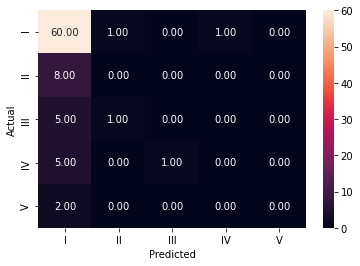

              precision    recall  f1-score   support

           0       0.75      0.97      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.71        84
   macro avg       0.15      0.19      0.17        84
weighted avg       0.55      0.71      0.62        84



C:\Users\7uxs48\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Method,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score,Multi-Class Logloss
1,Logistic Regression without Sampling,0.754491,0.714286,0.553571,0.714286,0.623742,0.894264


In [77]:
# For multiclass problems, only 'newton-cg', 'sag', 'saga' and 'lbfgs' handle multinomial loss; 'liblinear' is limited to one-versus-rest schemes.

resultsDf = pd.DataFrame()

# Building a Linear Regression model
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state = 1)
                                                     
# Train and Test the model
resultsDf = train_test_model(lr, 'Logistic Regression without Sampling', X_train, X_test, y_train, y_test, 'none', 1, 'no', 'yes', 'no')

# Store the accuracy results for each model in a dataframe for final comparison
resultsDf

RandomForestClassifier(n_estimators=10, random_state=1)
***************************************************************************


C:\Users\7uxs48\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


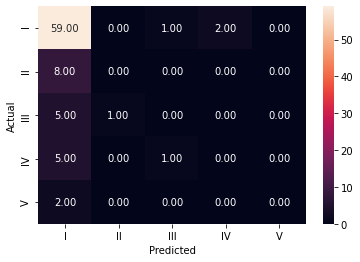

              precision    recall  f1-score   support

           0       0.75      0.95      0.84        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.70        84
   macro avg       0.15      0.19      0.17        84
weighted avg       0.55      0.70      0.62        84



C:\Users\7uxs48\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Method,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score,Multi-Class Logloss
1,Logistic Regression without Sampling,0.754491,0.714286,0.553571,0.714286,0.623742,0.894264
2,Random Forest with original data,0.955090,0.702381,0.551236,0.702381,0.617697,3.413944


In [78]:
# Building a Random Forest Classifier on Training set
rfc_model = RandomForestClassifier(n_estimators=10, random_state=1)

# Train and Test the model
rf_df = train_test_model(rfc_model, 'Random Forest with original data', X_train, X_test, y_train, y_test, 'none', 2, 'no', 'yes', 'no')

#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.concat([resultsDf,rf_df])
resultsDf

LogisticRegression(multi_class='multinomial', random_state=1)
***************************************************************************


C:\Users\7uxs48\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


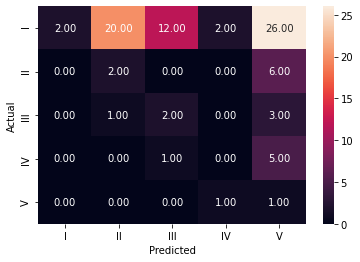

              precision    recall  f1-score   support

           0       1.00      0.03      0.06        62
           1       0.09      0.25      0.13         8
           2       0.13      0.33      0.19         6
           3       0.00      0.00      0.00         6
           4       0.02      0.50      0.05         2

    accuracy                           0.08        84
   macro avg       0.25      0.22      0.09        84
weighted avg       0.76      0.08      0.07        84



,Method,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score,Multi-Class Logloss
1,Logistic Regression without Sampling,0.754491,0.714286,0.553571,0.714286,0.623742,0.894264
2,Random Forest with original data,0.955090,0.702381,0.551236,0.702381,0.617697,3.413944
3,Logistic Regression with Sampling,0.356275,0.083333,0.756481,0.083333,0.073133,1.701462


In [79]:
# Building a Linear Regression model
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state = 1)
                                                     
# Train and Test the model
lr_df = train_test_model(lr, 'Logistic Regression with Sampling', X_train_up, X_test, y_train_up, y_test, 'none', 3, 'no', 'yes', 'no')

#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.concat([resultsDf,lr_df])
resultsDf

LogisticRegression(multi_class='multinomial', random_state=1)
***************************************************************************


C:\Users\7uxs48\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\7uxs48\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


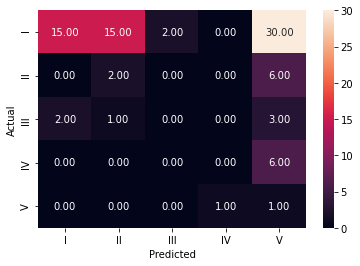

              precision    recall  f1-score   support

           0       0.88      0.24      0.38        62
           1       0.11      0.25      0.15         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.02      0.50      0.04         2

    accuracy                           0.21        84
   macro avg       0.20      0.20      0.12        84
weighted avg       0.66      0.21      0.30        84



,Method,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score,Multi-Class Logloss
1,Logistic Regression without Sampling,0.754491,0.714286,0.553571,0.714286,0.623742,0.894264
2,Random Forest with original data,0.955090,0.702381,0.551236,0.702381,0.617697,3.413944
3,Logistic Regression with Sampling,0.356275,0.083333,0.756481,0.083333,0.073133,1.701462
4,Logistic Regression with SMOTE,0.442105,0.214286,0.662360,0.214286,0.295933,1.654097


In [80]:
# Building a Linear Regression model
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state = 1)
                                                     
# Train and Test the model
lr_smote_df = train_test_model(lr, 'Logistic Regression with SMOTE', X_train_smote, X_test, y_train_smote, y_test, 'none', 4, 'no', 'yes', 'no')

#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.concat([resultsDf,lr_smote_df])
resultsDf

In [84]:
import lightgbm as lgb

def train_test_allmodels(X_train_common, X_test_common, y_train, y_test, scale):

    # define classification models
    models=[['LogisticRegression',LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state = 1)],
        ['RidgeClassifier',RidgeClassifier(random_state = 1)],
        #['Lasso',Lasso(random_state = 1)],
        ['KNeighborsClassifier',KNeighborsClassifier(n_neighbors = 3)],
        ['SVC',SVC(kernel = 'rbf', probability=True)],
        ['DecisionTreeClassifier',DecisionTreeClassifier(criterion = 'gini', random_state=1)],
        ['RandomForestClassifier',RandomForestClassifier(n_estimators=10, random_state=1)],
        ['BaggingClassifier',BaggingClassifier(n_estimators=30, max_samples=0.75, random_state=1, oob_score=True)],
        ['ExtraTreesClassifier',ExtraTreesClassifier(n_estimators = 50, criterion='entropy', max_features='auto', min_samples_split=2, 
                                 bootstrap=True, oob_score=True)],
        ['AdaBoostClassifier',AdaBoostClassifier(n_estimators=100, learning_rate=0.25, random_state=1)],
        ['GradientBoostingClassifier',GradientBoostingClassifier(loss='deviance', n_estimators=50, learning_rate=0.1, validation_fraction=0.2, 
                                       random_state=1)],
        ['LGBMClassifier',LGBMClassifier(random_state=1, metric = "multi_logloss", objective="multiclass")],
                                         #early_stopping_rounds = 30)],
        ['XGBClassifier',XGBClassifier(min_child_weight = 7, max_depth = 6, objective="multi:softmax", learning_rate = 0.1, gamma = 0.4, 
                                       colsample_bytree = 0.5)]
    ]

    resultsDf_common = pd.DataFrame()
    i = 1
    for name, classifier in models:
        # Train and Test the model
        reg_resultsDf = train_test_model(classifier, name, X_train_common, X_test_common, y_train, y_test, 'none', i, scale, 'no', 'no')

        # Store the accuracy results for each model in a dataframe for final comparison
        resultsDf_common = pd.concat([resultsDf_common, reg_resultsDf])
        i = i+1

    return resultsDf_common

#### 4. Modelling - Logistic Regression - SMOTE

LogisticRegression(multi_class='multinomial', random_state=1)
***************************************************************************


C:\Users\7uxs48\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\7uxs48\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


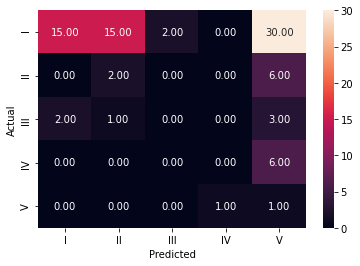

              precision    recall  f1-score   support

           0       0.88      0.24      0.38        62
           1       0.11      0.25      0.15         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.02      0.50      0.04         2

    accuracy                           0.21        84
   macro avg       0.20      0.20      0.12        84
weighted avg       0.66      0.21      0.30        84



,Method,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score,Multi-Class Logloss
1,Logistic Regression without Sampling,0.754491,0.714286,0.553571,0.714286,0.623742,0.894264
2,Random Forest with original data,0.955090,0.702381,0.551236,0.702381,0.617697,3.413944
3,Logistic Regression with Sampling,0.356275,0.083333,0.756481,0.083333,0.073133,1.701462
4,Logistic Regression with SMOTE,0.442105,0.214286,0.662360,0.214286,0.295933,1.654097
4,Logistic Regression with SMOTE,0.442105,0.214286,0.662360,0.214286,0.295933,1.654097
4,Logistic Regression with SMOTE,0.442105,0.214286,0.662360,0.214286,0.295933,1.654097


In [85]:
# Building a Linear Regression model
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state = 1)
                                                     
# Train and Test the model
lr_smote_df = train_test_model(lr, 'Logistic Regression with SMOTE', X_train_smote, X_test, y_train_smote, y_test, 'none', 4, 'no', 'yes', 'no')

#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.concat([resultsDf,lr_smote_df])
resultsDf

#### All models - Original data

In [86]:
# Train and Test all models with Lasso interaction terms
train_test_allmodels(X_train, X_test, y_train, y_test, 'no')

C:\Users\7uxs48\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\7uxs48\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\7uxs48\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\7uxs48\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: Undefi

[01:06:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Method,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score,Multi-Class Logloss
1,LogisticRegression,0.754491,0.714286,0.553571,0.714286,0.623742,0.894264
2,RidgeClassifier,0.757485,0.726190,0.562798,0.726190,0.634138,1.000000
3,KNeighborsClassifier,0.742515,0.726190,0.601190,0.726190,0.642790,6.094028
4,SVC,0.739521,0.738095,0.544785,0.738095,0.626875,0.902108
5,DecisionTreeClassifier,0.994012,0.607143,0.609599,0.607143,0.606349,13.577057
6,RandomForestClassifier,0.955090,0.702381,0.551236,0.702381,0.617697,3.413944
7,BaggingClassifier,0.964072,0.714286,0.553571,0.714286,0.623742,2.304895
8,ExtraTreesClassifier,0.994012,0.726190,0.549071,0.726190,0.625331,1.235876
9,AdaBoostClassifier,0.736527,0.726190,0.663004,0.726190,0.653817,1.252899
10,GradientBoostingClassifier,0.937126,0.690476,0.579683,0.690476,0.629380,0.967042


#### All models - Oversampling data

In [87]:
# Train and Test all models with Lasso interaction terms
train_test_allmodels(X_train_up, X_test, y_train_up, y_test, 'no')

C:\Users\7uxs48\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\7uxs48\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\7uxs48\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted

[01:07:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Method,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score,Multi-Class Logloss
1,LogisticRegression,0.356275,0.083333,0.756481,0.083333,0.073133,1.701462
2,RidgeClassifier,0.799190,0.738095,0.544785,0.738095,0.626875,1.000000
3,KNeighborsClassifier,0.948988,0.250000,0.596057,0.250000,0.298241,8.882442
4,SVC,0.289069,0.071429,0.005102,0.071429,0.009524,1.597353
5,DecisionTreeClassifier,0.998381,0.583333,0.652791,0.583333,0.604478,14.391157
6,RandomForestClassifier,0.998381,0.702381,0.637131,0.702381,0.628391,3.131216
7,BaggingClassifier,0.998381,0.702381,0.589697,0.702381,0.641106,1.641985
8,ExtraTreesClassifier,0.998381,0.690476,0.541893,0.690476,0.607227,1.684021
9,AdaBoostClassifier,0.356275,0.738095,0.544785,0.738095,0.626875,1.236702
10,GradientBoostingClassifier,0.963563,0.666667,0.672224,0.666667,0.668098,0.997115


In [ ]:
#### All models - SMOTE data

In [88]:
# Train and Test all models with Lasso interaction terms
train_test_allmodels(X_train_smote, X_test, y_train_smote, y_test, 'no')

C:\Users\7uxs48\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\7uxs48\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\7uxs48\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[01:07:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\7uxs48\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Method,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score,Multi-Class Logloss
1,LogisticRegression,0.442105,0.214286,0.662360,0.214286,0.295933,1.654097
2,RidgeClassifier,0.791903,0.071429,0.005102,0.071429,0.009524,1.000000
3,KNeighborsClassifier,0.907692,0.154762,0.497024,0.154762,0.168746,8.948456
4,SVC,0.295547,0.071429,0.005102,0.071429,0.009524,1.595718
5,DecisionTreeClassifier,0.998381,0.416667,0.518088,0.416667,0.454445,20.147620
6,RandomForestClassifier,0.995951,0.666667,0.615242,0.666667,0.637530,2.447109
7,BaggingClassifier,0.995142,0.595238,0.589683,0.595238,0.588342,2.539121
8,ExtraTreesClassifier,0.998381,0.607143,0.581406,0.607143,0.591702,1.784046
9,AdaBoostClassifier,0.542510,0.726190,0.555850,0.726190,0.629704,1.311231
10,GradientBoostingClassifier,0.964372,0.607143,0.619983,0.607143,0.602237,1.089282


In [89]:
### By comparing the results from all above methods, all are over fitting the training data.

In [ ]:
from scipy.stats import randint as sp_randint

# define regressor models
models=[['LogisticRegression',LogisticRegression()],
    ['RidgeClassifier',RidgeClassifier()],
    ['KNeighborsClassifier',KNeighborsClassifier()],
    ['SVC',SVC()],
    ['RandomForestClassifier',RandomForestClassifier()],
    ['BaggingClassifier',BaggingClassifier()],
    ['ExtraTreesClassifier',ExtraTreesClassifier()],
    ['AdaBoostClassifier',AdaBoostClassifier()],
    ['GradientBoostingClassifier',GradientBoostingClassifier()],
    ['LGBMClassifier',LGBMClassifier(verbose=False)],
    ['XGBClassifier',XGBClassifier()]
]

# define model parameters

lr_param_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                 'penalty': ['l2'],
                 #'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                 'C': [100, 10, 1.0, 0.1, 0.01]}
                 #'class_weight':['none','balanced'],
                 #'multi_class':['ovr', 'multinomial']}
ridge_param_grid = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                    'class_weight':['none','balanced'],
                    'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
lasso_param_grid = {'alpha': [0.02, 0.024, 0.025, 0.026, 0.03]}
knn_param_grid = {'n_neighbors': range(3, 21, 2),
                 'weights': ['uniform', 'distance'],
                 'metric': ['euclidean', 'manhattan', 'minkowski']}
svc_param_grid = {'kernel': ['poly', 'rbf', 'sigmoid'],
                 'C': [50, 10, 1.0, 0.1, 0.01],
                 'gamma': ['scale'],
                 'probability':[True],
                 'decision_function_shape': ['ovo', 'ovr']}
rf_param_grid = {'n_estimators': [10, 100, 1000],
                 'max_features': ['auto', 'sqrt', 'log2']}              
                 #'class_weight':['balanced','balanced_subsample','none']}
bag_param_grid = {'n_estimators': [10, 100, 1000],
                 'max_samples': np.arange(0.7, 0.8, 0.05)}
et_param_grid = {'n_estimators': np.arange(10,100,10),
                 'max_features': ['auto', 'sqrt', 'log2'],
                 'min_samples_split': np.arange(2,15,1)}
                 #'class_weight':['balanced','balanced_subsample','none']}
adb_param_grid = {'n_estimators': np.arange(30,100,10),
                 'learning_rate': np.arange(0.1,1,0.5)}
gb_param_grid = {'n_estimators': [10, 50, 100, 500],
                 'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                 'subsample':[0.5, 0.7, 1.0],
                 'max_depth': [3, 7, 9]}
catb_param_grid = {'task_type': 'GPU','depth': [4, 7, 10],
                  'learning_rate' : [0.03, 0.1, 0.15],
                  'l2_leaf_reg': [1,4,9],
                  'early_stopping_rounds':[50],
                  'iterations': [300],
                  'loss_function':['MultiClass']}
lightgbm_param_grid = {'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                  'n_estimators': [10, 50, 100, 500, 1000, 5000],
                  'min_child_samples': sp_randint(100, 500), 
                  'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
                  'boosting_type':['gbdt', 'dart', 'goss'],
                  'bagging_fraction': (0.5, 1),
                  'bagging_frequency' : (5, 8),
                  'feature_fraction': (0.5, 0.8),
                  'max_depth': (10, 13),
                  'min_data_in_leaf': (90, 120),
                  'num_leaves':(1200, 1550),
                  'metric': ['multi_logloss'],
                  'objective': ['multiclass'],
                  'num_class': [5],
                  'early_stopping_rounds':[50],
                  'verbosity':[1]}
xgb_param_grid = {'learning_rate': [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
                  'max_depth' : [3, 4, 5, 6, 8, 10, 12, 15],
                  'min_child_weight': [ 1, 3, 5, 7],
                  'gamma': [0.0, 0.1, 0.2 , 0.3, 0.4],
                  'colsample_bytree': [ 0.3, 0.4, 0.5 , 0.7],
                  'objective': ['multi:softmax'],
                  'eval_metric': ['mlogloss'],
                  'num_class': [5]}

for name, classifier in models:
    if name == 'LogisticRegression':
        lr_best_estimator = hyperparameterstune_model(name, classifier, X_train, y_train, lr_param_grid)
    elif name == 'Ridge':
        ridge_best_estimator = hyperparameterstune_model(name, classifier, X_train, y_train, lasso_param_grid)
    elif name == 'KNeighborsClassifier':
        knn_best_estimator = hyperparameterstune_model(name, classifier, X_train, y_train, knn_param_grid)
    elif name == 'SVC':
        svc_best_estimator = hyperparameterstune_model(name, classifier, X_train, y_train, svc_param_grid)
    elif name == 'RandomForestClassifier':
        rf_best_estimator = hyperparameterstune_model(name, classifier, X_train, y_train, rf_param_grid)
    elif name == 'BaggingClassifier':
        bag_best_estimator = hyperparameterstune_model(name, classifier, X_train, y_train, bag_param_grid)
    elif name == 'ExtraTreesClassifier':
        et_best_estimator = hyperparameterstune_model(name, classifier, X_train, y_train, et_param_grid)
    elif name == 'AdaBoostClassifier':
        adb_best_estimator = hyperparameterstune_model(name, classifier, X_train, y_train, adb_param_grid)
    elif name == 'GradientBoostingClassifier':
        gb_best_estimator = hyperparameterstune_model(name, classifier, X_train, y_train, gb_param_grid)
    elif name == 'CatBoostClassifier':
        catb_best_estimator = hyperparameterstune_model(name, classifier, X_train, y_train, catb_param_grid)
    elif name == 'LGBMClassifier':
        lightgbm_best_estimator = hyperparameterstune_model(name, classifier, X_train, y_train, lightgbm_param_grid)
    elif name == 'XGBClassifier':
        xgb_best_estimator = hyperparameterstune_model(name, classifier, X_train, y_train, xgb_param_grid)

C:\Users\7uxs48\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\7uxs48\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\7uxs48\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Best F1_Score: -0.907606 using {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
-0.907606 (0.062365) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
95% Confidence interval range: (-1.0323 %, -0.7829 %)
Total duration 19.536131858825684 



C:\Users\7uxs48\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\7uxs48\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\7uxs48\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Best F1_Score: -2.636566 using {'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'uniform'}
-2.636566 (1.115315) with: {'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'uniform'}
95% Confidence interval range: (-4.8672 %, -0.4059 %)
Total duration 14.589922904968262 



C:\Users\7uxs48\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\7uxs48\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\7uxs48\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Best F1_Score: -0.902368 using {'C': 50, 'decision_function_shape': 'ovr', 'gamma': 'scale', 'kernel': 'sigmoid', 'probability': True}
-0.902368 (0.066229) with: {'C': 50, 'decision_function_shape': 'ovr', 'gamma': 'scale', 'kernel': 'sigmoid', 'probability': True}
95% Confidence interval range: (-1.0348 %, -0.7699 %)
Total duration 30.130528688430786 



C:\Users\7uxs48\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\7uxs48\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\7uxs48\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Best F1_Score: -0.961575 using {'max_features': 'log2', 'n_estimators': 1000}
-0.961575 (0.099830) with: {'max_features': 'log2', 'n_estimators': 1000}
95% Confidence interval range: (-1.1612 %, -0.7619 %)
Total duration 100.7982017993927 



C:\Users\7uxs48\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\7uxs48\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\7uxs48\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Best F1_Score: -1.088500 using {'max_samples': 0.75, 'n_estimators': 1000}
-1.088500 (0.276458) with: {'max_samples': 0.75, 'n_estimators': 1000}
95% Confidence interval range: (-1.6414 %, -0.5356 %)
Total duration 198.74850416183472 



C:\Users\7uxs48\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\7uxs48\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\7uxs48\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Best F1_Score: -0.933869 using {'max_features': 'log2', 'min_samples_split': 13, 'n_estimators': 60}
-0.933869 (0.089455) with: {'max_features': 'log2', 'min_samples_split': 13, 'n_estimators': 60}
95% Confidence interval range: (-1.1128 %, -0.7550 %)
Total duration 147.85789132118225 



C:\Users\7uxs48\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\7uxs48\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\7uxs48\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Best F1_Score: -1.119952 using {'learning_rate': 0.1, 'n_estimators': 30}
-1.119952 (0.057614) with: {'learning_rate': 0.1, 'n_estimators': 30}
95% Confidence interval range: (-1.2352 %, -1.0047 %)
Total duration 8.018585681915283 



C:\Users\7uxs48\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\7uxs48\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\7uxs48\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


#### Bootstrap Sampling - RandomForestClassifier

In [ ]:
ind_feat_df.drop(['Accident Level','Potential Accident Level'], axis = 1, inplace=True) # Considering all Predictors

# Consider only top 30 GLOVE features
ind_feat_df = ind_feat_df.join(y.reset_index(drop=True))
ind_feat_df.head(2)

In [ ]:
values = ind_feat_df.values

# Number of bootstrap samples to create
n_iterations = 1000        

# size of a bootstrap sample
n_size = int(len(ind_feat_df) * 1)    

# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
rf_stats = list()   
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
     # fit model
    rfTree = RandomForestClassifier(n_estimators=100)

    # fit against independent variables and corresponding target values
    rfTree.fit(train[:,:-1], train[:,-1]) 

    # Take the target column for all rows in test set
    y_bs_test = test[:,-1]  

    # evaluate model
    # predict based on independent variables in the test data
    score = rfTree.score(test[:, :-1] , y_bs_test)
    predictions = rfTree.predict(test[:, :-1]) 

    rf_stats.append(score)

In [ ]:
# plot scores
plt.hist(rf_stats)
plt.show()

# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(rf_stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(rf_stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

In [ ]:
#### Bootstrap Sampling - AdaBoostClassifier

In [ ]:
alues = ind_feat_df.values

# Number of bootstrap samples to create
n_iterations = 1000        

# size of a bootstrap sample
n_size = int(len(ind_feat_df) * 1)    

# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
adab_stats = list()   
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
     # fit model
    adabTree = AdaBoostClassifier(n_estimators=100, learning_rate=0.25, random_state=1)

    # fit against independent variables and corresponding target values
    adabTree.fit(train[:,:-1], train[:,-1]) 

    # Take the target column for all rows in test set
    y_bs_test = test[:,-1]  

    # evaluate model
    # predict based on independent variables in the test data
    score = adabTree.score(test[:, :-1] , y_bs_test)
    predictions = adabTree.predict(test[:, :-1]) 

    adab_stats.append(score)

In [ ]:
# plot scores
plt.hist(adab_stats)
plt.show()

# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(adab_stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(adab_stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

In [ ]:
#### Bootstrap Sampling - XGBClassifier

In [ ]:
alues = ind_feat_df.values

# Number of bootstrap samples to create
n_iterations = 1000        

# size of a bootstrap sample
n_size = int(len(ind_feat_df) * 1)    

# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
xgb_stats = list()   
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
     # fit model
    xgbTree = XGBClassifier(max_depth = 6, objective="multi:softmax", learning_rate = 0.1, gamma = 0.4)

    # fit against independent variables and corresponding target values
    xgbTree.fit(train[:,:-1], train[:,-1]) 

    # Take the target column for all rows in test set
    y_bs_test = test[:,-1]  

    # evaluate model
    # predict based on independent variables in the test data
    score = xgbTree.score(test[:, :-1] , y_bs_test)
    predictions = xgbTree.predict(test[:, :-1]) 

    xgb_stats.append(score)